In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('results_analyse/cont_r2.csv')

FileNotFoundError: [Errno 2] File Q3A.csv does not exist: 'Q3A.csv'

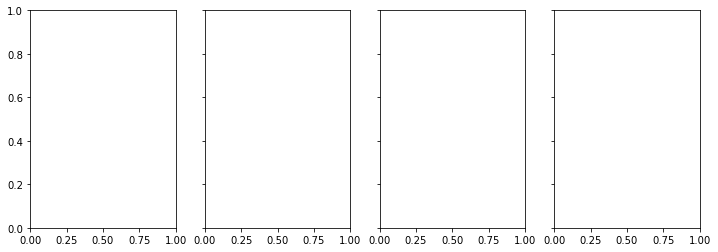

In [5]:
treats="Control,Day 4,Day 10,Banked".split(',')
from math import pi
fig,axs = plt.subplots(1,4,sharex=True,sharey=True,figsize=(12,4))
for i,exp in enumerate('Q3A  Q8   Q20  Q24'.split()):
    data = pd.read_csv('{}.csv'.format(exp))
    ax = axs[i]
    ax.annotate("{}".format(exp),xy=(0.2,0.9),xycoords='axes fraction')

    ax.annotate("{}".format(treats[i]),xy=(0.5,1.05),xycoords='axes fraction',ha='center')
    for istring in data['string'].unique() :
        mask = (data['string']==istring)&(data['code']=='o')
        ax.plot(np.power(data.loc[mask,'Volume'].values*3/(4*pi),1./3.),'.-',color='red',label='Oocyte')
        mask = (data['string']==istring)&(data['code']=='n')
        ax.plot(np.power(data.loc[mask,'Volume'].values*3/(4*pi),1./3.),'.-',color='blue',label='Nurse')
    if( i==3):
        from matplotlib.lines import Line2D
        colors = ['red', 'blue',]
        lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-.') for c in colors]
        labels = ['Oocyte', 'Nurse']
        ax.legend(lines, labels)
axs[0].annotate("Eq. Spherical Radius / $\mu$m",xy=(-0.30,0.5),xycoords='axes fraction',va='center',rotation=90,fontsize=14)
axs[1].annotate("Cell number in chain",xy=(1.1,-0.2),xycoords='axes fraction',ha='center',fontsize=14)
#ax.set_xlabel("cell number")

In [ ]:
np.power(data.loc[mask,'Volume'].values,1./3.)

In [7]:
def split_results(df):
    mask = (data['string']==istring)&(data['code']=='o')
    oc = np.power(data.loc[mask,'Volume'].values*3/(4*pi),1./3.)

In [8]:
data = pd.read_csv('Q10B.csv')

FileNotFoundError: [Errno 2] File Q10B.csv does not exist: 'Q10B.csv'

In [9]:
data = pd.read_csv("results_analyse/cont_r1.csv")

In [10]:
def unpack_results( df, istring, code, volume=True):
    '''Unpacks the oocyte and nurse cell data from a df'''
    istrings = df['string'].unique()
    if( istring not in istrings): 
        return 'Nothing here'
    
    mask = (df['string']==istring)&(df['code']==code)
    if( volume ):
        return df.loc[mask,'Volume']
    else:
        return np.power(df.loc[mask,'Volume'].values*3/(4*np.pi),1./3.)

def vol2length( vol):
    return np.power(vol*3/(4*np.pi),1./3.)
    
def plot_sizes( ax, data):
    for istring in data['string'].unique() :
        mask1 = (data['string']==istring)&(data['code']=='o')
        ax.plot(np.power(data.loc[mask1,'Volume'].values*3/(4*np.pi),1./3.),'.-',color='red',label='Oocyte')
        mask2 = (data['string']==istring)&(data['code']=='n')
        ax.plot(vol2length(data.loc[mask2,'Volume'].values),'.-',color='blue',label='Nurse')
        n = min(sum(mask1),sum(mask2))
        ax.plot( (vol2length(data.loc[mask1,'Volume'].values)[:n])-
                 (vol2length(data.loc[mask2,'Volume'].values)[:n]),'.-',color='grey')

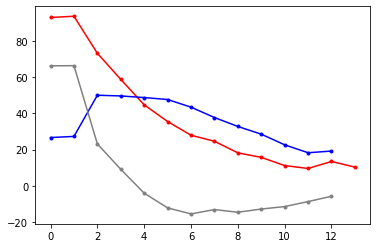

In [11]:
fig,ax = plt.subplots(1,1)
plot_sizes( ax,data)

## Read in all the results
These are stored in dictionary labed by treatments:
* cont
* caged_d04
* caged_d07
* caged_d10
* banked_d10

Each element of the dictionary is an array with the replicates

In [12]:
from glob import glob
result_dict={}
treats='cont caged_d04 caged_d07 caged_d10 banked_d10'.split()
for treat in treats:
    result_dict[treat]=[pd.read_csv(file) for file in glob("results_analyse/{}*.csv".format(treat))]


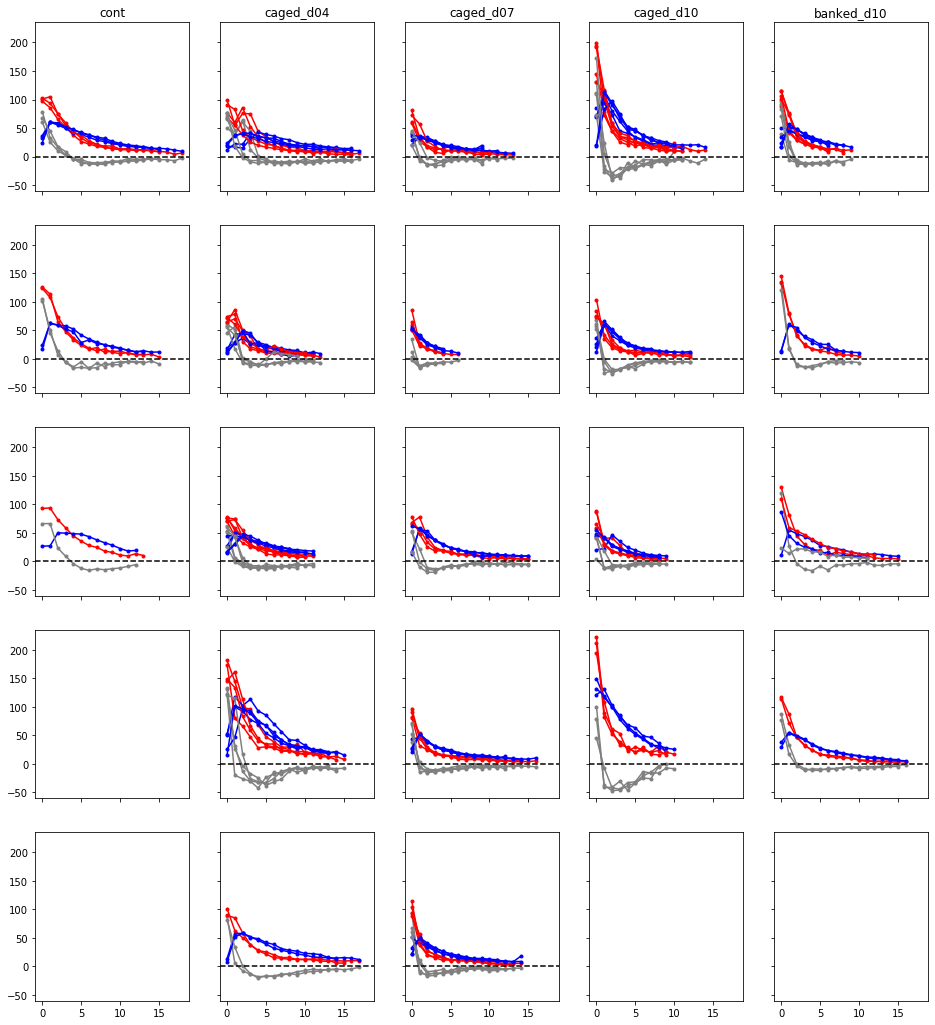

In [13]:
# replicates in each treatment
nreps = [len(arr) for key,arr in result_dict.items()]

fig,axs = plt.subplots(max(nreps),len(treats),sharex=True,sharey=True,figsize=(16,18))
for i,treat in enumerate(treats):
    res_arr = result_dict[treat]
    axs[0,i].set_title(treat)
    for j,data in enumerate(res_arr):
        ax = axs[j,i]
        plot_sizes( ax,data)
        ax.axhline(0,ls='--',color='black')

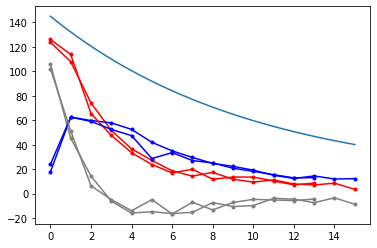

In [58]:
fig,ax = plt.subplots(1,1)
days = np.linspace(0,15)
plot_sizes( ax, result_dict['cont'][1])
ax.plot(days,135*np.exp(-0.1*days )+10)

In [67]:
df = result_dict['cont'][2]

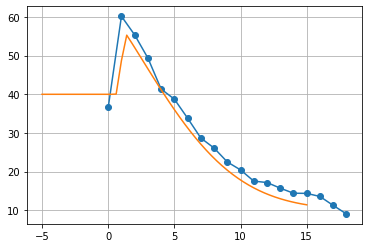

In [347]:
def oocyte_rad( ind, theta ):
    V0,Vmin, a1,a2 = theta
    return (V0-Vmin)*np.exp(-a1*ind-a2*ind**2)
def nurse_rad( ind, theta ):
    V0,Vmin, a1,a2, shift, Vdrop = theta
    res =  (D_switch_raw(ind-shift)) * (V0-Vmin)*np.exp(-a1*(ind-shift)-(a2*(ind-shift))**2)\
            +Vmin \
            +Vdrop*V0*(1-D_switch_raw(ind-shift))
    
    return res
rads = unpack_results(df,1,'n',volume=False)
ind = np.arange(len(rads))

plt.plot(ind,rads,'o-')
ss=np.linspace(-5,15,51)
plt.plot(ss,nurse_rad(ss,[60,10,0.1,0.1,0.5,0.5]) )
plt.grid()

Calibrate the beta distribution for the min percentage

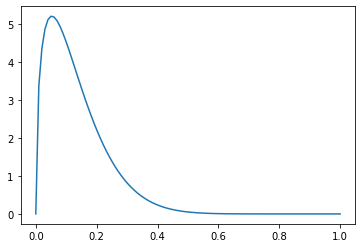

In [247]:
x=np.linspace(0,1,101)
beta_d = pm.Beta.dist(1.5,10)
plt.plot(x,np.exp(beta_d.logp(x).eval()))

In [267]:
df = result_dict['cont'][0]
nurse  = unpack_results(df,1,'n',volume=False)
occyte = unpack_results(df,0,'o',volume=False)
ind    = np.arange(len(nurse))

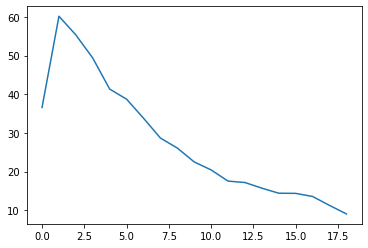

(0, 62.4206332241574)

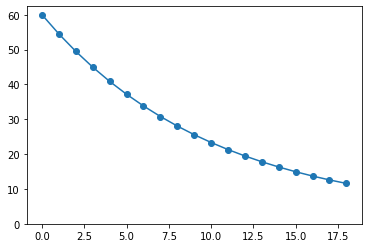

In [349]:
ind
nurse = (60-2)*np.exp(-0.1*ind)+2
plt.plot(ind,nurse,'o-')
plt.ylim(0,)

In [350]:
import pymc3 as pm


with pm.Model() as model:
    V0     = pm.Lognormal('V0',mu=np.log(60),sd=0.1)
    Vmin   = pm.Lognormal('Vmin',mu=np.log(10),sd=0.1)
    a1     = pm.Lognormal('a1',mu=np.log(0.1),sd=0.2)
    #a2     = pm.Lognormal('a2',mu=np.log(0.1),sd=0.2)
    #Vmin   = V0*Vmin_p
    
    nurse_rad = (V0-Vmin)*pm.math.exp(-a1*ind)+Vmin
    sd0  = pm.HalfCauchy('sd0',5)
    
    
    y = pm.Normal('y', nurse_rad, sd=sd0 ,observed=nurse)

In [351]:
with model:
    trace = pm.sample(tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd0, a1, Vmin, V0]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:07<00:00, 1414.32draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


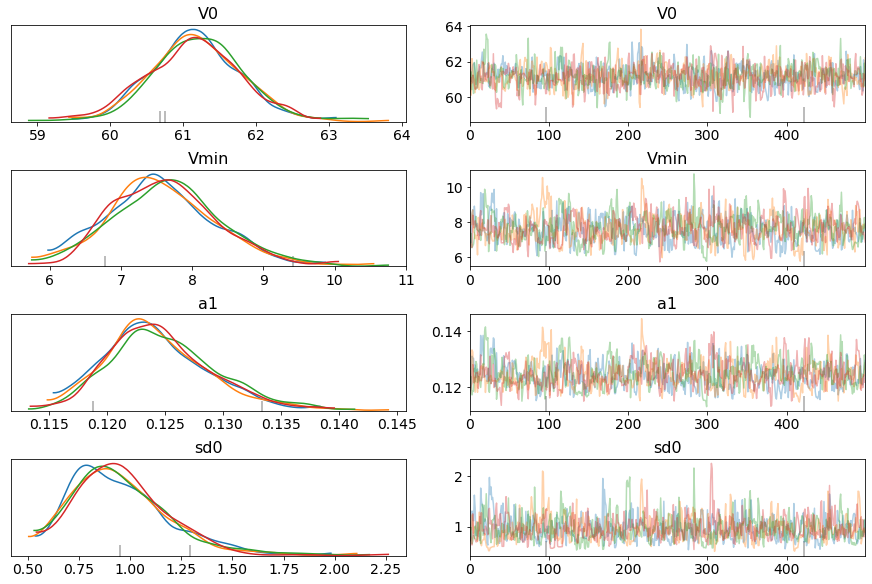

In [352]:
pm.traceplot(trace);

In [353]:
pm.hpd(trace.get_values('V0'))

array([60.06251208, 62.47374696])

In [298]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def perc_plot( ax, x, samp,mask=None, **kwargs  ):
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    if( mask is None): mask = range(len(x))
    percs = np.percentile( samp, [2.5,25,50,75,97.5], axis=0)
    ax.fill_between( x[mask], percs[0,mask],percs[4,mask], alpha=0.2, **kwargs )
    ax.fill_between( x[mask], percs[1,mask],percs[3,mask], alpha=0.5, **kwargs )
    ax.plot( x[mask], percs[2,mask], lw=1.5, **kwargs )
    return

In [301]:
trace.get_values('a1')

array([0.1278744 , 0.19165031, 0.1424994 , ..., 0.18696998, 0.13824607,
       0.19671869])

In [317]:
x=np.array(ind)
V0_t  =trace.get_values('V0')
Vmin_t=trace.get_values('Vmin')
a1_t  =trace.get_values('a1')
nchain,=a1_t.shape
nsamp = 300


vals = np.zeros([nsamp,len(x)])

for i,ir in enumerate(np.random.randint(nchain ,size=nsamp)):
    vals[i,:] = V0_t[ir]-Vmin_t[ir])*np.exp(-a1_t[ir]*x)

IndexError: too many indices for array

In [315]:
nchain

(2000,)

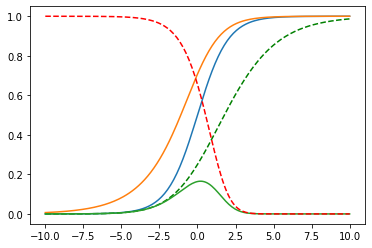

In [388]:
x = np.linspace(-10,10,200)
def logistic(x,v=1):
    return 1/(1+np.exp(-x))**(1/v)

plt.plot(x,logistic(x,v=1))
plt.plot(x,logistic(x,v=2))
plt.plot(x,logistic(0.5*x,v=0.5),color='green',ls='--')
plt.plot(x,logistic(0.5*x,v=0.5)*(logistic(-1*(x-2),v=0.3)))
plt.plot(x,                      (logistic(-1*(x-2),v=0.3)),color='red',ls='--')